# Robust Regression 

In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import (LinearRegression, 
                                  TheilSenRegressor, 
                                  RANSACRegressor, 
                                  HuberRegressor)

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)


In [10]:
# Import Data
#data = pd.read_csv('data/data_encod.csv', index_col=[0])
data = pd.read_csv('data/train_771.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (5289, 770)
Train: (5289, 770)
Test: (0, 770)


In [11]:
#fillna
train = train.fillna(train.mean())

In [12]:
columns_to_drop = ['target']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (5289, 769)
y: (5289,)
X_train: (3702, 769)
y_train: (3702,)
X_test: (1587, 769)
y_test: (1587,)


In [13]:
# Defining models: 

estimators = [('OLS', LinearRegression()),
              ('Theil-Sen', TheilSenRegressor(random_state=42)),
              ('RANSAC', RANSACRegressor(random_state=42)),
              ('HuberRegressor', HuberRegressor())]
colors = {'OLS': 'turquoise', 'Theil-Sen': 'gold', 'RANSAC': 'lightgreen', 'HuberRegressor': 'black'}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}


In [14]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

model: OLS RMS_train: 32.18 RMS_test: 39.83


KeyboardInterrupt: 

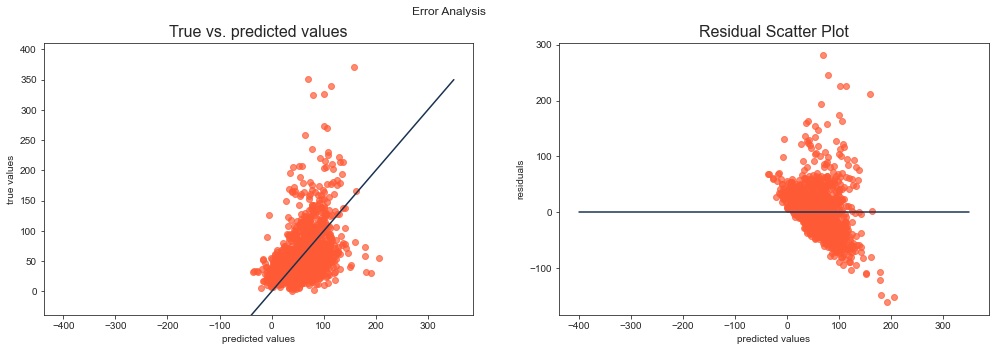

In [15]:

for name, estimator in estimators:
    model = make_pipeline(estimator)
    model.fit(X_train, y_train)
    y_predict_train = model.predict(X_train)
    y_predict_test = model.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_predict_train, y_train))
    rmse_test = np.sqrt(mean_squared_error(y_predict_test, y_test))
    print(f'model: {name} RMS_train: {rmse_train:.2f} RMS_test: {rmse_test:.2f}')
    error_analysis(y_test, y_predict_test)

